In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, recall_score, accuracy_score

In [23]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

df = pd.read_csv(Url)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.shape

(891, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [29]:
df.drop(columns= "Cabin", inplace= True)
df.dropna(inplace = True)

In [30]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket']
df.drop(columns = drop_elements, inplace = True)

In [31]:
df.shape

(889, 8)

In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [35]:
scaler = LabelEncoder()
df["Sex"] = scaler.fit_transform(df["Sex"])
df["Embarked"] = scaler.fit_transform(df["Embarked"])

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

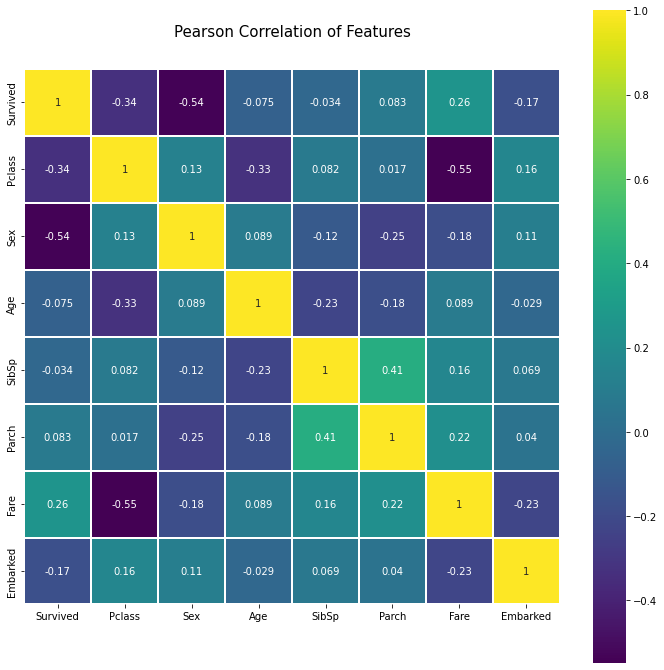

In [36]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap,  linecolor='white', annot=True)

In [37]:
x = df.drop(columns = ["Survived", "Parch","Pclass"])
y = df["Survived"]

In [85]:
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=i)
    tree = DecisionTreeClassifier(max_depth=7)
    tree.fit(x_train, y_train)
    a = tree.score(x_train, y_train)
    b = tree.score(x_test, y_test)
    if a > .84 and b > .84:
        print(a,b,i)

0.8678678678678678 0.8654708520179372 10
0.8708708708708709 0.852017937219731 21
0.8543543543543544 0.8609865470852018 24
0.8738738738738738 0.8475336322869955 27
0.8708708708708709 0.8430493273542601 28
0.8813813813813813 0.874439461883408 81
0.8693693693693694 0.874439461883408 95
0.8723723723723724 0.8430493273542601 96
0.8693693693693694 0.8430493273542601 103
0.8558558558558559 0.8430493273542601 108
0.8768768768768769 0.8565022421524664 133
0.8693693693693694 0.8430493273542601 136
0.8633633633633634 0.8475336322869955 168
0.8573573573573574 0.8430493273542601 190
0.8663663663663663 0.8475336322869955 293
0.8723723723723724 0.8565022421524664 296
0.8678678678678678 0.8430493273542601 299
0.8633633633633634 0.8609865470852018 347
0.8543543543543544 0.8475336322869955 362
0.8828828828828829 0.8430493273542601 365
0.8513513513513513 0.8475336322869955 395
0.8693693693693694 0.8430493273542601 431
0.8558558558558559 0.8475336322869955 472
0.8453453453453453 0.8430493273542601 473
0.8

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=293)

In [92]:
tree = DecisionTreeClassifier(max_depth=7)

In [93]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [94]:
tree.score(x_train, y_train)

0.8663663663663663

In [95]:
tree.score(x_test, y_test)

0.8609865470852018

In [96]:
y_pred = tree.predict(x_test)

In [97]:
confusion_matrix(y_test, y_pred=y_pred)

array([[131,  12],
       [ 19,  61]], dtype=int64)

In [98]:
accuracy_score(y_test, y_pred= y_pred)

0.8609865470852018

In [99]:
precision_score(y_test, y_pred = y_pred)

0.8356164383561644

In [100]:
recall_score(y_test, y_pred = y_pred)

0.7625